In [2]:
import pandas as pd
import numpy as np

# Breast Cancer 데이터셋 가져오기 (출처: UCI ML Repository)
uci_path = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"
df = pd.read_csv(uci_path, header=None)

# 열 이름 지정
df.columns = ['id_number', 'diagnosis', 'radius_mean', 
              'texture_mean', 'perimeter_mean', 'area_mean', 
              'smoothness_mean', 'compactness_mean', 
              'concavity_mean','concave_points_mean', 
              'symmetry_mean', 'fractal_dimension_mean',
              'radius_se', 'texture_se', 'perimeter_se', 
              'area_se', 'smoothness_se', 'compactness_se', 
              'concavity_se', 'concave_points_se', 
              'symmetry_se', 'fractal_dimension_se', 
              'radius_worst', 'texture_worst', 
              'perimeter_worst', 'area_worst', 
              'smoothness_worst', 'compactness_worst', 
              'concavity_worst', 'concave_points_worst', 
              'symmetry_worst', 'fractal_dimension_worst'] 
#  IPython 디스플레이 설정 - 출력할 열의 개수 한도 늘리기
pd.set_option('display.max_columns', 30)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
id_number                  569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave_points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [4]:
df.groupby(by='diagnosis').mean()

,id_number,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,...,compactness_se,concavity_se,concave_points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
B,2.654382e+07,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,0.284082,1.220380,2.000321,21.135148,...,0.021438,0.025997,0.009858,0.020584,0.003636,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442
M,3.681805e+07,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,0.609083,1.210915,4.323929,72.672406,...,0.032281,0.041824,0.015060,0.020472,0.004062,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530


In [24]:
corr=df.iloc[:,2:].corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave_points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1,0.32,1,0.99,0.17,0.51,0.68,0.82,0.15,-0.31,0.68,-0.097,0.67,0.74,-0.22,0.21,0.19,0.38,-0.1,-0.043,0.97,0.3,0.97,0.94,0.12,0.41,0.53,0.74,0.16,0.0071
texture_mean,0.32,1,0.33,0.32,-0.023,0.24,0.3,0.29,0.071,-0.076,0.28,0.39,0.28,0.26,0.0066,0.19,0.14,0.16,0.0091,0.054,0.35,0.91,0.36,0.34,0.078,0.28,0.3,0.3,0.11,0.12
perimeter_mean,1,0.33,1,0.99,0.21,0.56,0.72,0.85,0.18,-0.26,0.69,-0.087,0.69,0.74,-0.2,0.25,0.23,0.41,-0.082,-0.0055,0.97,0.3,0.97,0.94,0.15,0.46,0.56,0.77,0.19,0.051
area_mean,0.99,0.32,0.99,1,0.18,0.5,0.69,0.82,0.15,-0.28,0.73,-0.066,0.73,0.8,-0.17,0.21,0.21,0.37,-0.072,-0.02,0.96,0.29,0.96,0.96,0.12,0.39,0.51,0.72,0.14,0.0037
smoothness_mean,0.17,-0.023,0.21,0.18,1,0.66,0.52,0.55,0.56,0.58,0.3,0.068,0.3,0.25,0.33,0.32,0.25,0.38,0.2,0.28,0.21,0.036,0.24,0.21,0.81,0.47,0.43,0.5,0.39,0.5
compactness_mean,0.51,0.24,0.56,0.5,0.66,1,0.88,0.83,0.6,0.57,0.5,0.046,0.55,0.46,0.14,0.74,0.57,0.64,0.23,0.51,0.54,0.25,0.59,0.51,0.57,0.87,0.82,0.82,0.51,0.69
concavity_mean,0.68,0.3,0.72,0.69,0.52,0.88,1,0.92,0.5,0.34,0.63,0.076,0.66,0.62,0.099,0.67,0.69,0.68,0.18,0.45,0.69,0.3,0.73,0.68,0.45,0.75,0.88,0.86,0.41,0.51
concave_points_mean,0.82,0.29,0.85,0.82,0.55,0.83,0.92,1,0.46,0.17,0.7,0.021,0.71,0.69,0.028,0.49,0.44,0.62,0.095,0.26,0.83,0.29,0.86,0.81,0.45,0.67,0.75,0.91,0.38,0.37
symmetry_mean,0.15,0.071,0.18,0.15,0.56,0.6,0.5,0.46,1,0.48,0.3,0.13,0.31,0.22,0.19,0.42,0.34,0.39,0.45,0.33,0.19,0.091,0.22,0.18,0.43,0.47,0.43,0.43,0.7,0.44
fractal_dimension_mean,-0.31,-0.076,-0.26,-0.28,0.58,0.57,0.34,0.17,0.48,1,0.00011,0.16,0.04,-0.09,0.4,0.56,0.45,0.34,0.35,0.69,-0.25,-0.051,-0.21,-0.23,0.5,0.46,0.35,0.18,0.33,0.77


In [18]:
#속성 변수 선택
X=df.iloc[:,2:]
y=df['diagnosis']

feature_selection = df.iloc[:,2:]

# 설명 변수 데이터를 정규화
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)

# train data 와 test data로 구분(7:3 비율)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10) 

print('train data 개수: ', X_train.shape)
print('test data 개수: ', X_test.shape)
print('\n')

train data 개수:  (398, 30)
test data 개수:  (171, 30)




In [19]:
# model.fit
# run logistic regression and vary some parameters
from sklearn.linear_model import LogisticRegression
from sklearn import metrics as mt

model_logit = LogisticRegression()
model_logit.fit(X_train, y_train)

print('train_score: ', model_logit.score(X_train, y_train))
print('Test_score: ', model_logit.score(X_test, y_test))


train_score:  0.9874371859296482
Test_score:  0.9649122807017544


In [20]:
y_hat = model_logit.predict(X_test) # get test set precitions


# now let's get the accuracy and confusion matrix for this iterations of training/testing
acc = mt.accuracy_score(y_test,y_hat)
conf = mt.confusion_matrix(y_test,y_hat)

print("accuracy", acc )
print("confusion matrix\n",conf)

# 모형 성능 평가 - 평가지표 계산
logit_report = mt.classification_report(y_test, y_hat)            
print(logit_report)

accuracy 0.9649122807017544
confusion matrix
 [[108   4]
 [  2  57]]
              precision    recall  f1-score   support

           B       0.98      0.96      0.97       112
           M       0.93      0.97      0.95        59

    accuracy                           0.96       171
   macro avg       0.96      0.97      0.96       171
weighted avg       0.97      0.96      0.97       171



In [21]:
# iterate over the coefficients
weights = model_logit.coef_.T # take transpose to make a column vector
variable_names = feature_selection.columns
for coef, name in zip(weights,variable_names):
    print(name, 'has weight of', coef[0])

radius_mean has weight of 0.32291743659342076
texture_mean has weight of 0.3848714011067302
perimeter_mean has weight of 0.3096412920046044
area_mean has weight of 0.39304470112006157
smoothness_mean has weight of 0.07274572133302155
compactness_mean has weight of -0.42696838296079237
concavity_mean has weight of 0.814399019576386
concave_points_mean has weight of 0.8114103363545151
symmetry_mean has weight of -0.09398492556193358
fractal_dimension_mean has weight of -0.3675450019394214
radius_se has weight of 1.3271810958673482
texture_se has weight of 0.01872648477020943
perimeter_se has weight of 0.4928651600452257
area_se has weight of 0.8463198634130387
smoothness_se has weight of 0.26391078991133704
compactness_se has weight of -1.0189609502379118
concavity_se has weight of 0.17837198486899072
concave_points_se has weight of 0.4180469843346741
symmetry_se has weight of -0.7273545553985837
fractal_dimension_se has weight of -0.7596921367063386
radius_worst has weight of 0.94662101

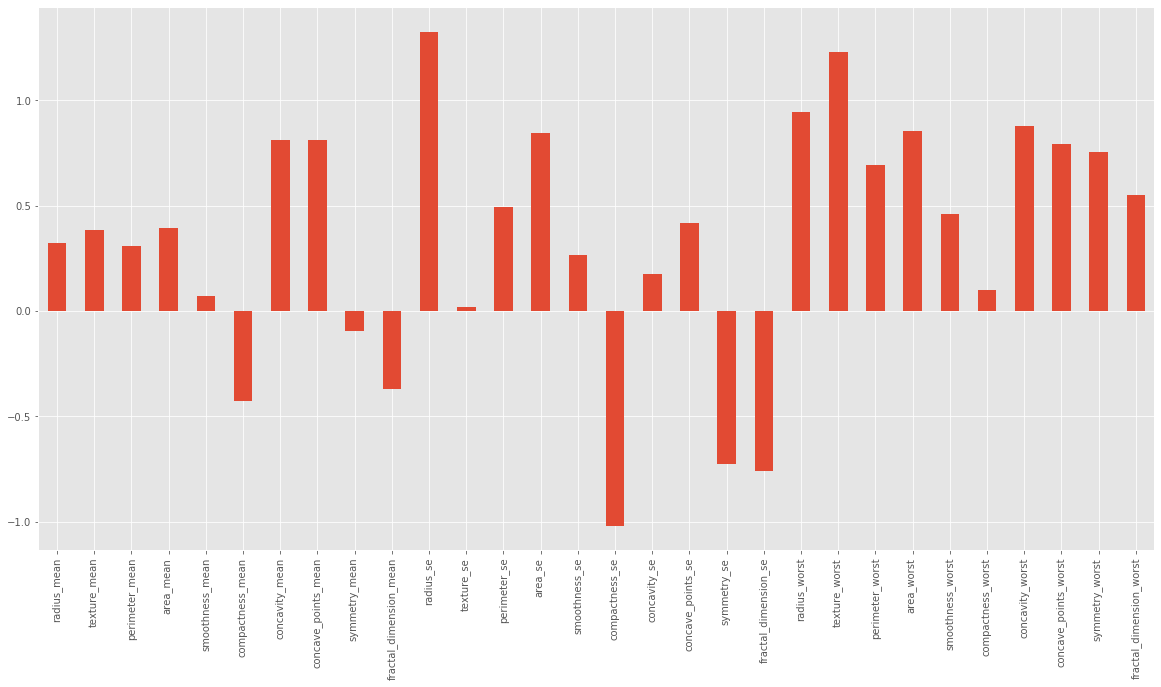

In [22]:
# now let's make a pandas Series with the names and values, and plot them
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

plt.figure(figsize = (20,10))
weights = pd.Series(model_logit.coef_[0],index=feature_selection.columns)
weights.plot(kind='bar')
plt.show()